In [4]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
import math

**DIP assignment 1**
- - - - 


#### **Q 2**
---

*part 1*

[  5 246   5]


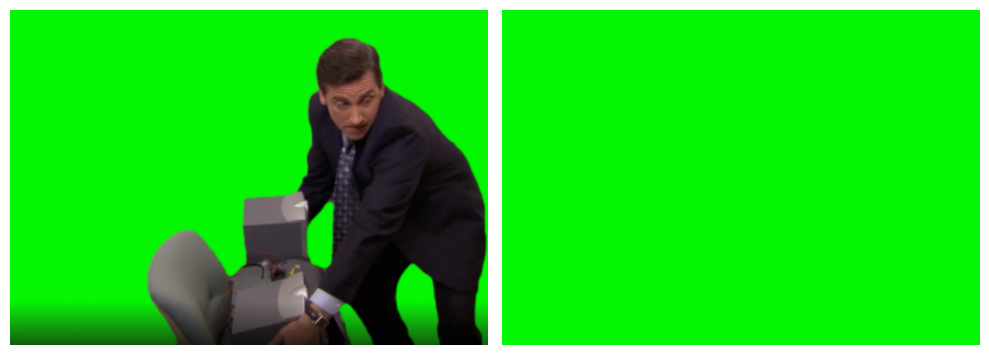

In [32]:
fg = cv2.cvtColor(cv2.imread('./../images/foreground.png'), cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(cv2.imread('./../images/background.png'), cv2.COLOR_BGR2RGB)

img_temp = fg.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

f, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(fg)
ax[1].imshow(img_temp)
ax[0].axis('off') #hide the axis
ax[1].axis('off')
print(img_temp[0][0])
f.tight_layout()
plt.show()


*part 2*

In [33]:
def merge(fg,bg):
    bg = bg.copy()
    for i in range(len(fg)):
        for j in range(len(fg[i])):
            if(np.sqrt(np.sum(np.square([0,255,0] -fg[i][j]))) > 200):
                bg[i][j][0]= fg[i][j][0]
                bg[i][j][1]= fg[i][j][1]
                bg[i][j][2]= fg[i][j][2]
                
    return bg


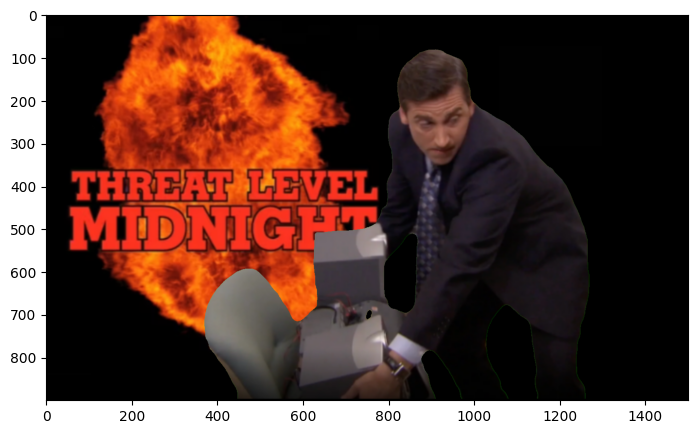

In [34]:

plt.figure(figsize=(10, 5))
plt.imshow(merge(fg,bg))
plt.show()

#### **Q 3**
---

*part 1*

In [37]:
def plotPLT(axis, arr):
  # Sort w.r.t range
  arr.sort(key=lambda x : x[2:4:])
  x1 = []
  y1 = []
  x1.append(0)
  y1.append(0)
  for i in arr:
    x1.append(i[2])
    x1.append(i[3])
    y1.append(i[2] * i[0] + i[1])
    y1.append(i[3] * i[0] + i[1])
  axis.plot(x1, y1)

In [21]:
def LinearTransform(img,k1,k2,a,b):
#     img = cv2.imread(im)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img1 = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img = img.astype(np.float64)/255
    x = img.shape[0]
    y = img.shape[1]
    len = img.shape[2]
    new = np.zeros((x,y,3), dtype = float)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len):
                real = img[i][j][k]
                temp = float(k1)*(img[i][j][k]) + float(k2)

                if(real > a and real < b):
                    new[i][j][k] = temp
                else:
                    new[i][j][k] = real
#                 elif(temp > b):
#                     new[i][j][k] = b
#                 elif(temp < a):
#                     new[i][j][k] = a
                new[i][j][k] = new[i][j][k] * 255


#                 print(new[i][j][k])
                
                
#     new = img_as_uint(new)
#     fig = plt.figure()
    new = new.astype(np.uint8)
#     plt.imshow(new)
#     plt.show()
    return new
    

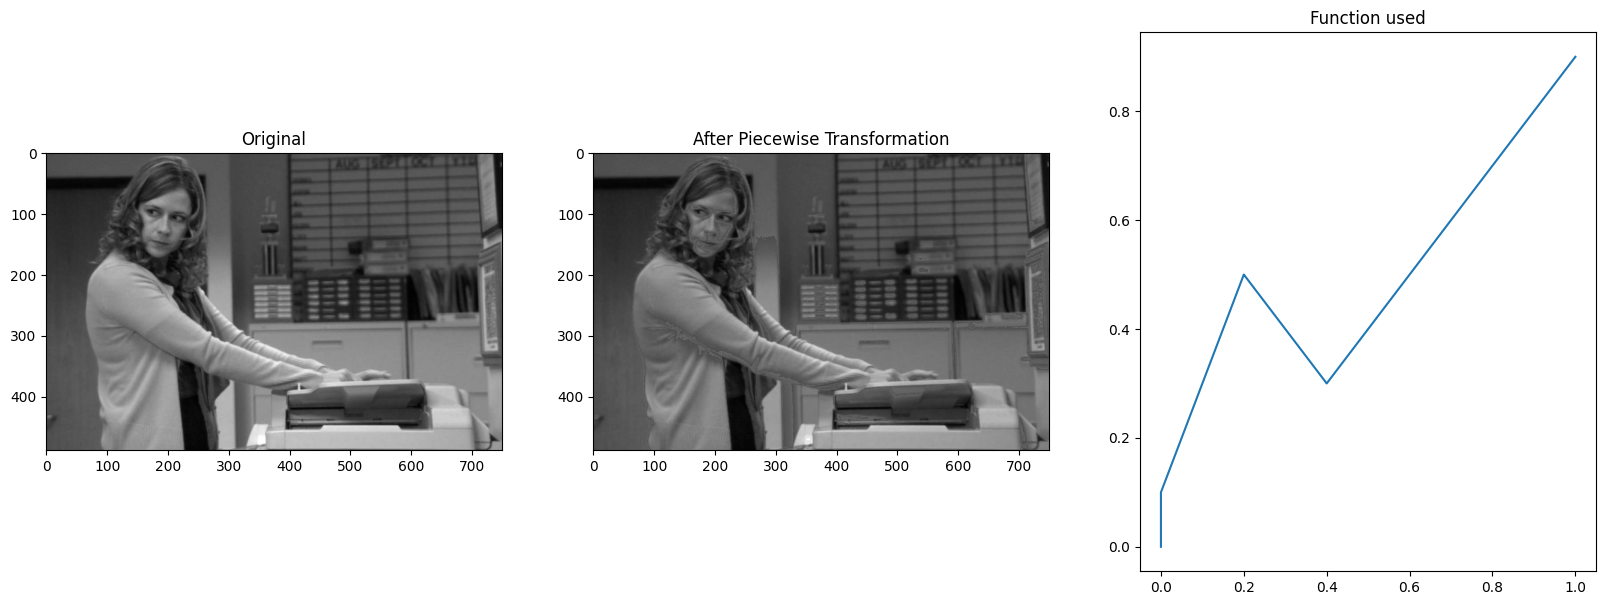

In [41]:

a = [0,0.2,0.4]
b = [0.2,0.4,1]

k1 = [2,-1,1]
k2 = [0.1,0.7,-0.1]

img = cv2.imread('./../images/pam1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig2 = plt.figure()
for i in range(len(a)):
    ans = LinearTransform(img,k1[i],k2[i],a[i],b[i])
#     plt.subplot(4,1,i+1)
#     plt.imshow(ans)
    
transformation = [[2, 0.1, 0, 0.2], [-1, 0.7, 0.2, 0.4], [1, -0.1, 0.4,1]]

f, axarr = plt.subplots(1,3,figsize=(20, 7))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(ans, cmap='gray')
axarr[1].title.set_text('After Piecewise Transformation')
plotPLT(axarr[2], transformation)
axarr[2].title.set_text('Function used')
plt.show()

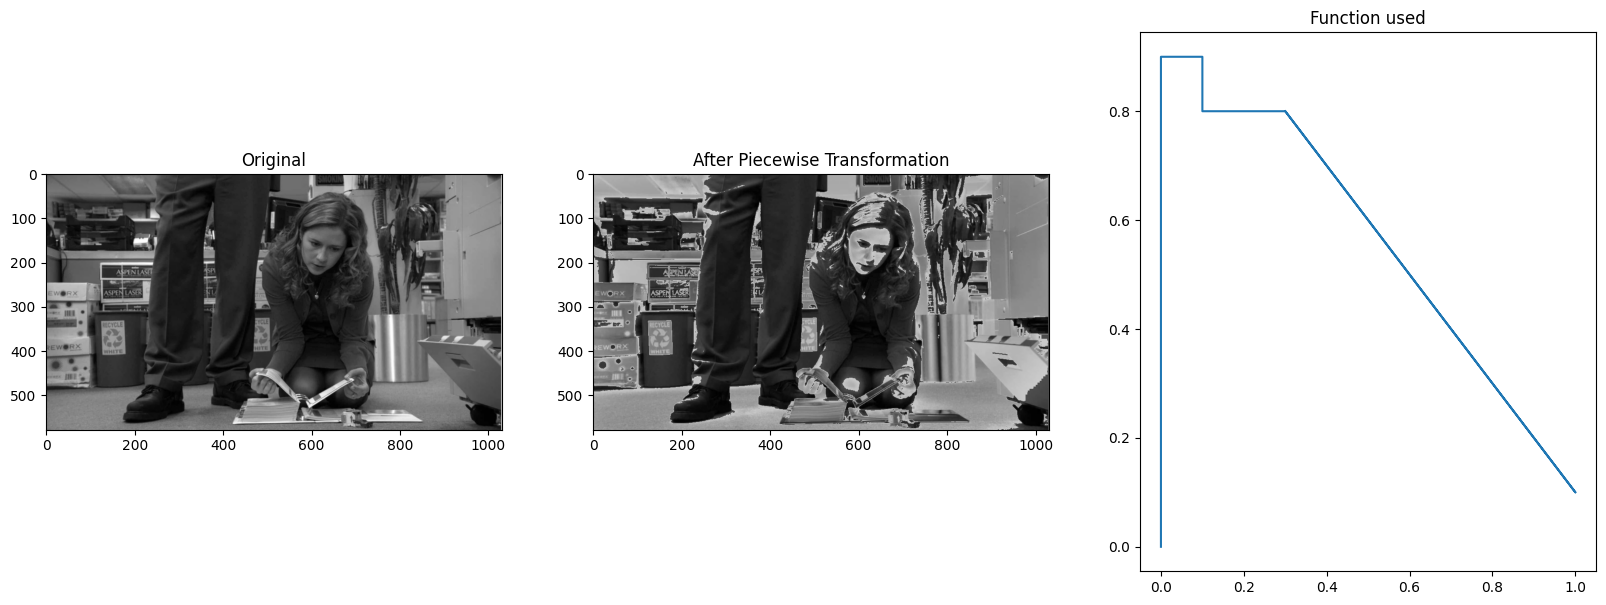

In [40]:

a = [0,0.1,0.3]
b = [0.1,0.3,1]

k2 = [0.9,0.8,1.1]
k1 = [0,0,-1]

img = cv2.imread('./../images/pam2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig2 = plt.figure()
for i in range(len(k1)):
    ans = LinearTransform(img,k1[i],k2[i],a[i],b[i])
#     plt.subplot(4,1,i+1)
#     plt.imshow(ans)

transformation = [[0, 0.9, 0, 0.1], [0, 0.8, 0.1, 0.3], [-1, 1.1, 1,0.3]]
f, axarr = plt.subplots(1,3,figsize=(20, 7))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(ans, cmap='gray')
axarr[1].title.set_text('After Piecewise Transformation')
plotPLT(axarr[2], transformation)
axarr[2].title.set_text('Function used')
plt.show()

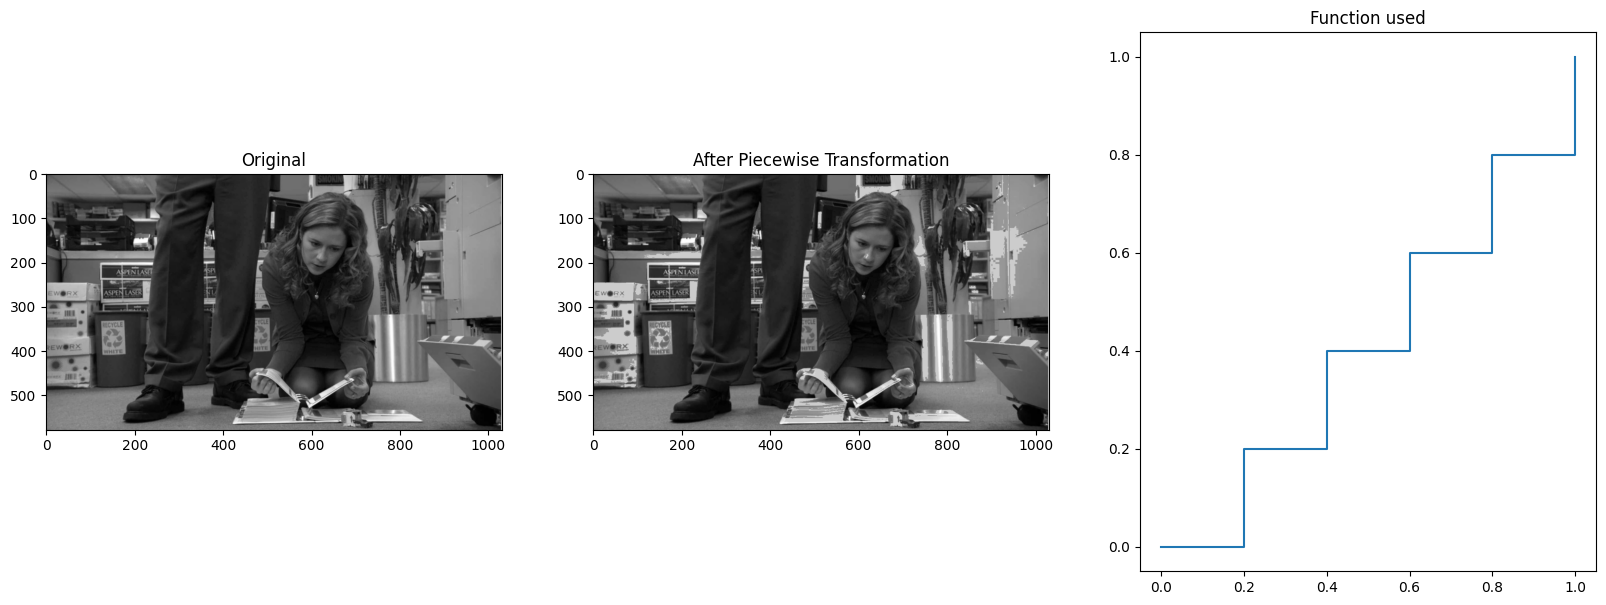

In [38]:
a = [0,0.2,0.4,0.6,0.8]
b = [0.2,0.4,0.6,0.8,1]

k2 = [0.2,0.4,0.6,0.8,1]
k1 = [0,0,0,0,0]

transformation = [[0, 1, 1, 1], [0, 0.8, 0.8, 1], [0, 0.6, 0.6, 0.8], [0, 0.4, 0.4, 0.6], [0, 0.2, 0.2, 0.4], [0, 0, 0, 0.2 ]]

img = cv2.imread('./../images/pam2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig2 = plt.figure()
for i in range(4):
    ans = LinearTransform(img,k1[i],k2[i],a[i],b[i])
#     plt.subplot(4,1,i+1)
#     plt.imshow(ans)
    
f, axarr = plt.subplots(1,3,figsize=(20, 7))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(ans, cmap='gray')
axarr[1].title.set_text('After Piecewise Transformation')
plotPLT(axarr[2], transformation)
axarr[2].title.set_text('Function used')
plt.show()

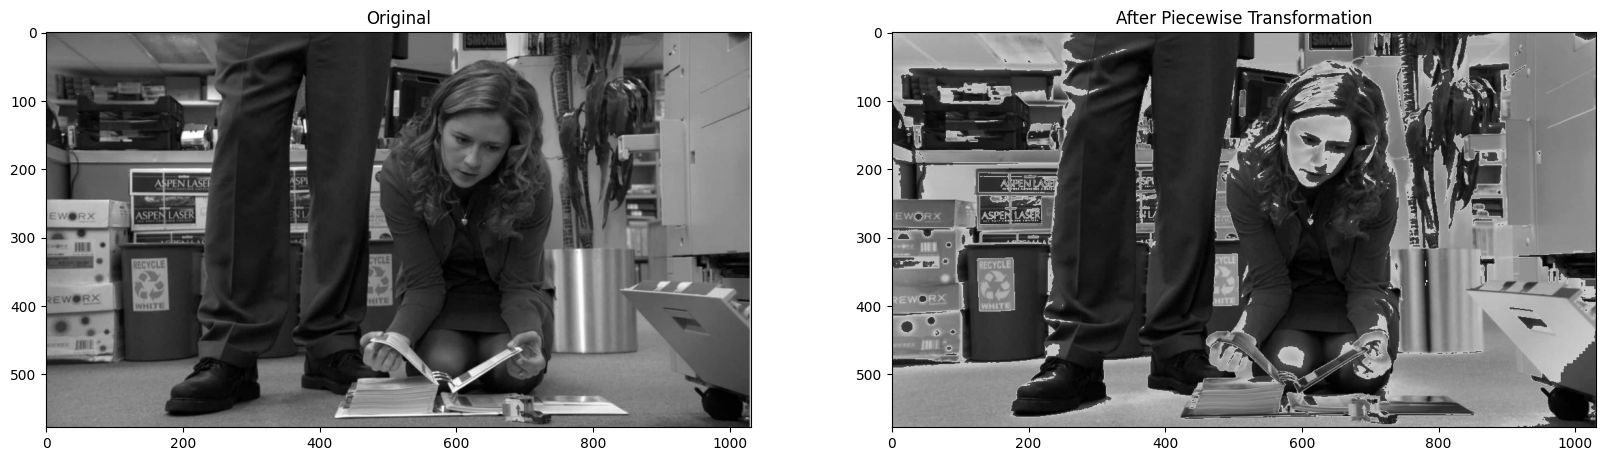

In [ ]:

a = [0,0.1,0.3]
b = [0.1,0.3,1]

k2 = [0.9,0.8,1.1]
k1 = [0,0,-1]

img = cv2.imread('./../images/pam2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig2 = plt.figure()
for i in range(len(k1)):
    ans = LinearTransform(img,k1[i],k2[i],a[i],b[i])
#     plt.subplot(4,1,i+1)
#     plt.imshow(ans)
    
f, axarr = plt.subplots(1,2,figsize=(20, 7))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(ans, cmap='gray')
axarr[1].title.set_text('After Piecewise Transformation')



steps

## **Q 4**
---

### **Part 1**

In [62]:
def bitSlicing(img , k ):
    bit_plane = img.copy().astype('uint8')
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            bit_plane[i,j] = img[i,j] & (2**(k))
   
    return bit_plane
    

### **Part 2**

In [ ]:
img = cv2.imread('./../images/rupee.jpg',0)

plt.imshow(img,cmap='gray')

f, axarr = plt.subplots(2,4,figsize=(20,8))
for i in range(2):
  for j in range(4):
    axarr[i][j].imshow(bitSlicing(img, i * 4 + j), cmap='gray')
    axarr[i][j].title.set_text("Bit plane where k = " + str(i * 4 + j + 1))

In [ ]:
img = cv2.imread('./../images/securityThreat.jpg',0)

plt.imshow(img,cmap='gray')

f, axarr = plt.subplots(2,4,figsize=(20,8))
for i in range(2):
  for j in range(4):
    axarr[i][j].imshow(bitSlicing(img, i * 4 + j), cmap='gray')
    axarr[i][j].title.set_text("Bit plane where k = " + str(i * 4 + j + 1))

In [ ]:
img = cv2.imread('./../images/pepper.jpg',0)

plt.imshow(img,cmap='gray')

f, axarr = plt.subplots(2,4,figsize=(20,8))
for i in range(2):
  for j in range(4):
    axarr[i][j].imshow(bitSlicing(img, i * 4 + j), cmap='gray')
    axarr[i][j].title.set_text("Bit plane where k = " + str(i * 4 + j + 1))

### **Part 3**

### **Part 4**

In [71]:
def imgBitQuantizer(im,k):
    k = 8-k-1
    im_new = np.zeros([im.shape[0],im.shape[1]],dtype = np.uint8)
    for i in range(k,8):
        im_new += bitSlicing(im,i)
    return im_new

### **Part 4**

In [ ]:
img = cv2.imread('./../images/rupee.jpg',0)

plt.imshow(img,cmap='gray')

f, axarr = plt.subplots(2,4,figsize=(20,8))
for i in range(2):
  for j in range(4):
    axarr[i][j].imshow(imgBitQuantizer(img, i * 4 + j), cmap='gray')
    axarr[i][j].title.set_text("Bit plane where k = " + str(i * 4 + j + 1))

In [ ]:
img = cv2.imread('./../images/securityThreat.jpg',0)

plt.imshow(img,cmap='gray')

f, axarr = plt.subplots(2,4,figsize=(20,8))
for i in range(2):
  for j in range(4):
    axarr[i][j].imshow(imgBitQuantizer(img, i * 4 + j), cmap='gray')
    axarr[i][j].title.set_text("Bit plane where k = " + str(i * 4 + j + 1))

In [ ]:
img = cv2.imread('./../images/pepper.jpg',0)

plt.imshow(img,cmap='gray')

f, axarr = plt.subplots(2,4,figsize=(20,8))
for i in range(2):
  for j in range(4):
    axarr[i][j].imshow(imgBitQuantizer(img, i * 4 + j), cmap='gray')
    axarr[i][j].title.set_text("Bit plane where k = " + str(i * 4 + j + 1))

Observation - as we increase the level of quantization the details of image increases
            - also we get the major proportion of the image in first 3-4  bits only 

### **Part 5** -
 application as the title suggests "slice off the un-necessary , this has a very good use in reducing data size , as we can observe that the image formed from the first k/2 significant bits is enough to make the image recogonisableto the original image , in this way by bit plane slicing we can remove many un necessary bits and thus save space while storage and transmission.

## **Q 5**
---

### **Part 1**

a). 
b).
c).

In [ ]:
def powerLawTransform(img,gamma):
    return np.array(255*(img / 255) ** gamma, dtype = 'uint8')

In [ ]:
def histEqualization(filename):
#     print(filename)
    im = cv2.imread(filename)
    
#     print(im)
#     plt.imshow(im)
#     cv2.waitKey(0)
    hist= np.histogram(im.flatten(),256,[0,256])

    cdf = hist[0].cumsum()
    cdf_normalized = cdf * hist[0].max()/ cdf.max()

    cdfm = np.ma.masked_equal(cdf,0)
    minf = cdfm.min()
    maxf = cdfm.max()
    cdfm = (cdfm - minf)*255/(maxf-minf)
    cdf1 = np.ma.filled(cdfm,0).astype('uint8')
    im2 = cdf1[im]
    
    s = np.amin(im)
    b = np.amax(im)
    
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.plot(cdf_normalized, color = 'g')
    plt.hist(im.flatten(),b,[s,b], color = 'r')
    plt.xlim([s,b])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.subplot(2,1,2)
    plt.plot(cdfm, color = 'g')
    plt.hist(im2.flatten(),b,[s,b], color = 'r')
    plt.xlim([s,b])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    
    fig2 = plt.figure()
#     res = np.hstack((im,im2))
#     cv2.imshow('Original vs. Equalized',res)
#     cv2.waitKey(0)
    plt.subplot(1,2,1)
    plt.imshow(im, cmap='gray')
#     plt.imshow(im)
    plt.title("Original")
    plt.subplot(1,2,2)
#     plt.imshow(im2)
    plt.imshow(im2, cmap='gray')
    plt.title("Equalized")
    plt.show()
    return im2

In [ ]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [ ]:
def ecdf(x):
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

In [ ]:
def histMatching(originalIm,newIm,flag):
#     originalIm = cv2.imread(org)
#     newIm = cv2.imread(ref)
#     a = "lol"
#     print(type(a))
    if(isinstance(originalIm, str)):
        originalIm = cv2.imread(originalIm)
        newIm = cv2.imread(newIm)
    
    
    old = originalIm.shape
    original = originalIm.ravel()
    new = newIm.ravel()
    
    s = np.unique(original, return_inverse=True,return_counts=True)
    t = np.unique(new, return_counts=True)
    
    
    s_quantiles = np.cumsum(s[2]).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    t_quantiles = np.cumsum(t[1]).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
 
    source1 = np.around(s_quantiles*255)
    template1 = np.around(t_quantiles*255)
    
    b=[]
    for data in source1[:]:
        b.append(find_nearest_above(template1,data))
    b= np.array(b,dtype='uint8')
 
    ans = b[s[1]].reshape(old)
    
    
    
    
#     cv2.imshow("Original",originalIm)
#     cv2.imshow("Template",newIm)
#     cv2.imshow("Matched",np.array(ans,dtype='uint8'))

    if(flag == 1):
        

        fig = plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(cv2.cvtColor(originalIm, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.subplot(1,3,2)
        plt.imshow(cv2.cvtColor(newIm, cv2.COLOR_BGR2RGB))
        plt.title("Template")
        plt.subplot(1,3,3)
        plt.imshow(np.array(ans,dtype='uint8'))
        plt.title("Matched")
    #     plt.show()

        orgx, orgy = ecdf(original)
        newx, newy = ecdf(new)
        ansx, ansy = ecdf(ans.ravel())

        fig2 = plt.figure()
        plt.plot(orgx, orgy * 100, '-r', lw=3, label='Source')
        plt.plot(newx, newy * 100, '-k', lw=3, label='Template')
        plt.plot(ansx, ansy * 100, '--r', lw=3, label='Matched')
        plt.ylabel('Cumulative %')
        plt.xlim(orgx[0], orgx[-1]+10)
        plt.xlabel('Pixel value')
        plt.legend(loc=7)
#     plt.show()
    
#     print(type(ans))
    return np.array(ans,dtype='uint8')
        
    
    